## Import All Neccessory Libraries 

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

## Data Gathering

In [3]:
df = pd.read_csv("iris.csv")
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
## checking info of data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
## count values of specises
df["species"].value_counts().to_dict()

{'Iris-setosa': 50, 'Iris-versicolor': 50, 'Iris-virginica': 50}

In [6]:
df.replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}, inplace=True)

In [7]:
df.head(4)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


In [9]:
## cheking any duplicate values present
df.duplicated(keep="first").value_counts()

False    147
True       3
dtype: int64

In [10]:
## drop duplicate values
df.drop_duplicates(keep="first",inplace=True,ignore_index=True)

In [12]:
## cheking null values
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [13]:
## cheking statistical info 
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,147.000000,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844,1.006803
std,0.829100,0.437009,1.759111,0.757874,0.815069
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [15]:
## cheking correlation
df.corr()


,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109321,0.871305,0.817058,0.782904
sepal_width,-0.109321,1.000000,-0.421057,-0.356376,-0.418348
petal_length,0.871305,-0.421057,1.000000,0.961883,0.948339
petal_width,0.817058,-0.356376,0.961883,1.000000,0.955693
species,0.782904,-0.418348,0.948339,0.955693,1.000000


<AxesSubplot:>

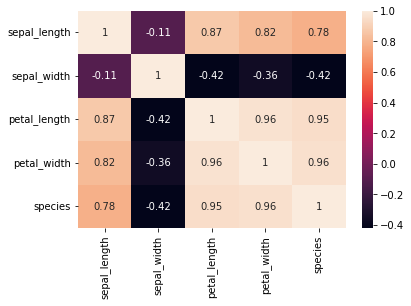

In [16]:
sns.heatmap(df.corr(), annot=True)

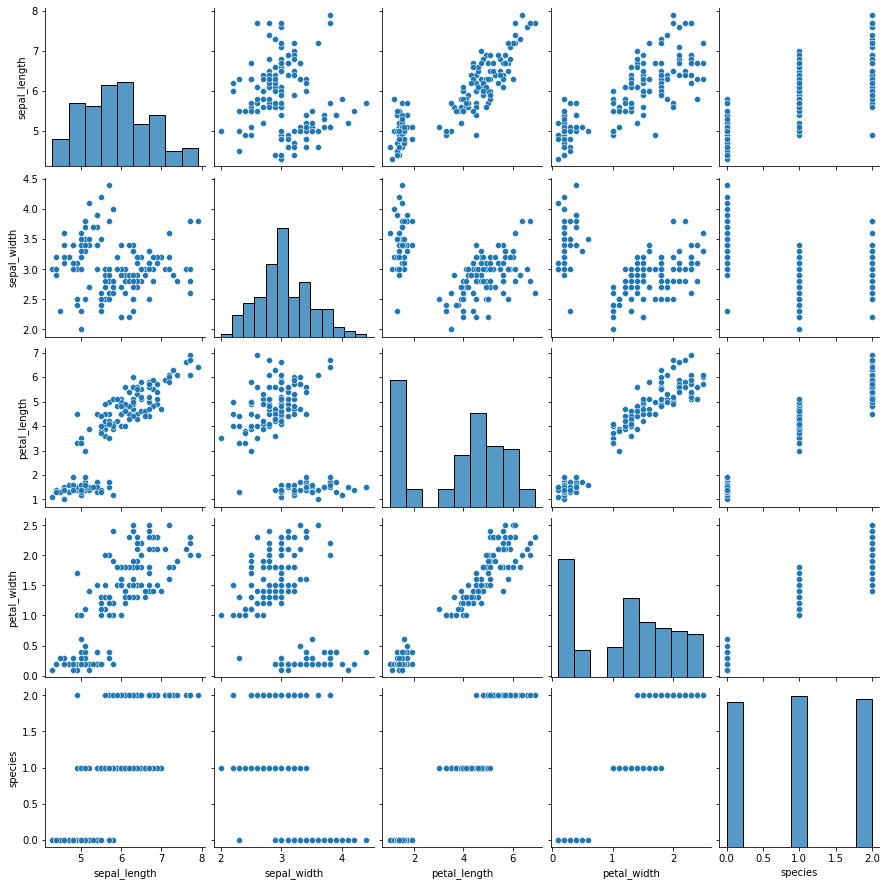

In [17]:
sns.pairplot(df)

In [18]:
x = df.drop("petal_width", axis=1)
y = df["petal_width"]

In [20]:
## split model into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=11)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((110, 4), (37, 4), (110,), (37,))

## Model Evoluation

In [21]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)


LinearRegression()

In [24]:
y_pred = lr_model.predict(x_test)

MSE = mean_squared_error(y_test,y_pred)
print(f"MSE=={MSE}")

MSE==0.03519293160189589


In [25]:
r2_score = r2_score(y_test, y_pred)
print(f"R2 score == {r2_score}")

R2 score == 0.937865458649735


In [26]:
lr_model.coef_

array([-0.10789199,  0.16009596,  0.29364974,  0.42247414])

In [28]:
lr_model.intercept_

-0.1756554633080507

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


In [33]:
def user_input():
    sepal_length = float(input("sepal_length"))
    sepal_width= float(input("sepal_width"))
    petal_length= float(input("petal_length"))
    species = int(input("species"))
    
    user_data = np.zeros(4)
    
    user_data[0] = sepal_length
    user_data[1] = sepal_width
    user_data[2] = petal_length
    user_data[3] = species
    
    Petal_width = lr_model.predict([user_data])
    print("Petal_width == ",Petal_width)
user_input()

sepal_length 5.1
sepal_width 3.5
petal_length 1.4
species 0


Petal_width ==  [0.24554087]


C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [29]:
import pickle

In [30]:
with open('linear_reg_model.pkl','wb') as file:
    pickle.dump(lr_model, file)